In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("dataset/dvd_rental_joined_data.csv")

# Display basic info about the dataset
print("datatype:", df.info())
print("\nShape:", df.shape)
print("\nUnique values per column:", df.nunique())
print("\nMissing values:", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160230 entries, 0 to 160229
Data columns (total 27 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   film_title        160230 non-null  object 
 1   film_description  160230 non-null  object 
 2   release_year      160230 non-null  int64  
 3   rental_duration   160230 non-null  int64  
 4   rental_rate       160230 non-null  float64
 5   length            160230 non-null  int64  
 6   replacement_cost  160230 non-null  float64
 7   rating            160230 non-null  object 
 8   special_features  160230 non-null  object 
 9   film_language     160230 non-null  object 
 10  film_genre        160230 non-null  object 
 11  rental_date       160230 non-null  object 
 12  return_date       158212 non-null  object 
 13  payment_amount    160230 non-null  float64
 14  payment_date      160230 non-null  object 
 15  actor_name        160230 non-null  object 
 16  customer_name     16

In [2]:
df.head()   # Display first few rows of the dataset

,film_title,film_description,release_year,rental_duration,rental_rate,length,replacement_cost,rating,special_features,film_language,...,email_id,membership,address,phone_number,district,city,country,staff_name,availability,store_id
0,Rules Human,A Beautiful Epistle of a Astronaut And a Stude...,2006,6,4.99,153,19.99,R,"{""Deleted Scenes"",""Behind the Scenes""}",English,...,peter.menard@sakilacustomer.org,True,1217 Konotop Avenue,718917251754,Gelderland,Ede,Netherlands,Jon Stephens,True,2
1,Rules Human,A Beautiful Epistle of a Astronaut And a Stude...,2006,6,4.99,153,19.99,R,"{""Deleted Scenes"",""Behind the Scenes""}",English,...,peter.menard@sakilacustomer.org,True,1217 Konotop Avenue,718917251754,Gelderland,Ede,Netherlands,Jon Stephens,True,2
2,Rules Human,A Beautiful Epistle of a Astronaut And a Stude...,2006,6,4.99,153,19.99,R,"{""Deleted Scenes"",""Behind the Scenes""}",English,...,peter.menard@sakilacustomer.org,True,1217 Konotop Avenue,718917251754,Gelderland,Ede,Netherlands,Jon Stephens,True,2
3,Rules Human,A Beautiful Epistle of a Astronaut And a Stude...,2006,6,4.99,153,19.99,R,"{""Deleted Scenes"",""Behind the Scenes""}",English,...,peter.menard@sakilacustomer.org,True,1217 Konotop Avenue,718917251754,Gelderland,Ede,Netherlands,Jon Stephens,True,2
4,Rules Human,A Beautiful Epistle of a Astronaut And a Stude...,2006,6,4.99,153,19.99,R,"{""Deleted Scenes"",""Behind the Scenes""}",English,...,peter.menard@sakilacustomer.org,True,1217 Konotop Avenue,718917251754,Gelderland,Ede,Netherlands,Jon Stephens,True,2


In [3]:
# Find columns with missing values
missing_columns = df.columns[df.isnull().any()]

print(f"Columns with missing values: {missing_columns}")
print("\nMissing values in each column:\n", df[missing_columns].isnull().sum())

# Calculate the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100

# Filter only columns that have missing values
missing_percentage = missing_percentage[missing_percentage > 0]

# Print the percentage of missing values in each column, rounded to 2 decimal places
print("\nPercentage of missing values in each column:")
print(missing_percentage.round(2))

Columns with missing values: Index(['return_date', 'district'], dtype='object')

Missing values in each column:
 return_date    2018
district       1048
dtype: int64

Percentage of missing values in each column:
return_date    1.26
district       0.65
dtype: float64


In [4]:
# Drop rows with missing values
df.dropna(inplace=True)

# Check for duplicates and drop if any
print("\nDuplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)

# Verify changes
print("\nShape after cleaning:", df.shape)


Duplicate rows: 78582

Shape after cleaning: (78582, 27)


In [5]:
# Total rows in the table
total_rows = df.shape[0]
print(f'Total rows in the table: {total_rows}')

Total rows in the table: 78582


In [6]:
df['rental_date'] = pd.to_datetime(df['rental_date'])
df['return_date'] = pd.to_datetime(df['return_date'])

# Extract month, day, and hour from rental_date

df['rental_month'] = df['rental_date'].dt.month
df['rental_day'] = df['rental_date'].dt.day
df['rental_hour'] = df['rental_date'].dt.hour

# Extract month, day, and hour from return_date

df['return_month'] = df['return_date'].dt.month
df['return_day'] = df['return_date'].dt.day
df['return_hour'] = df['return_date'].dt.hour

# Calculate rental duration (in days)
df['rental_duration_days'] = (df['return_date'] - df['rental_date']).dt.days

In [7]:
# Drop duplicate columns
df = df.loc[:, ~df.columns.duplicated()]

# Drop constant columns
df = df.loc[:, df.nunique() > 1]

In [8]:
# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
print("Numerical Columns:", numerical_cols)

categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
print("\nCategorical Columns:", categorical_cols)

Numerical Columns: ['rental_duration', 'rental_rate', 'length', 'replacement_cost', 'payment_amount', 'phone_number', 'store_id', 'rental_duration_days']

Categorical Columns: ['film_title', 'film_description', 'rating', 'special_features', 'film_genre', 'payment_date', 'actor_name', 'customer_name', 'email_id', 'address', 'district', 'city', 'country', 'staff_name']


#### Numerical Columns

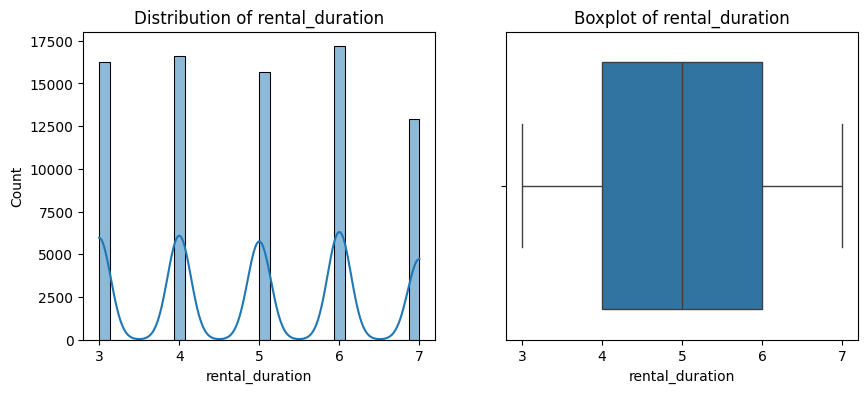

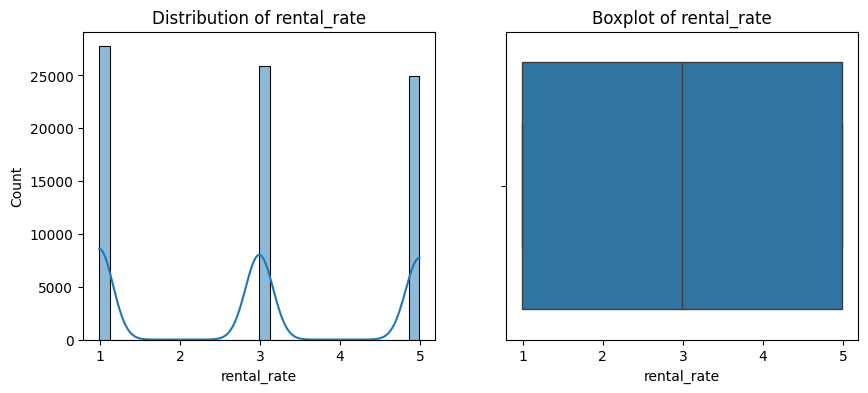

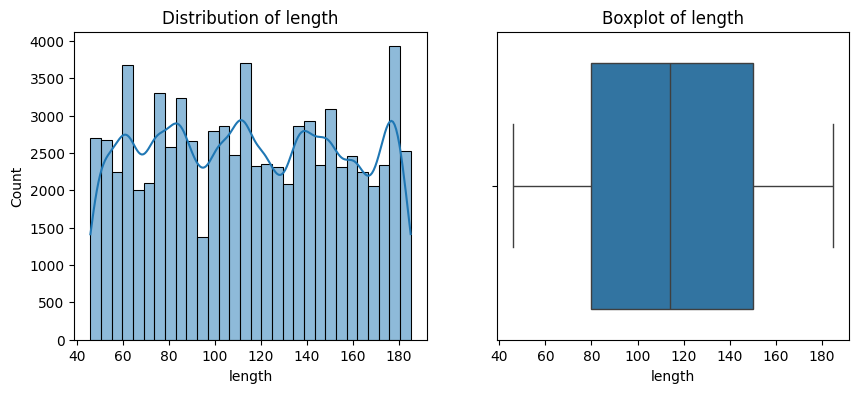

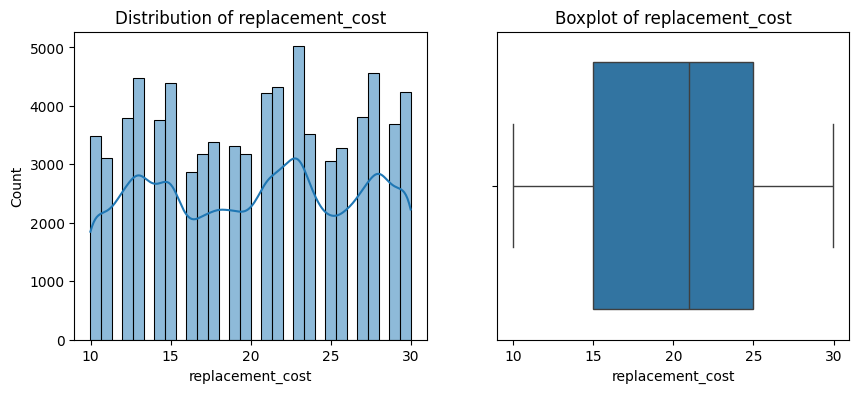

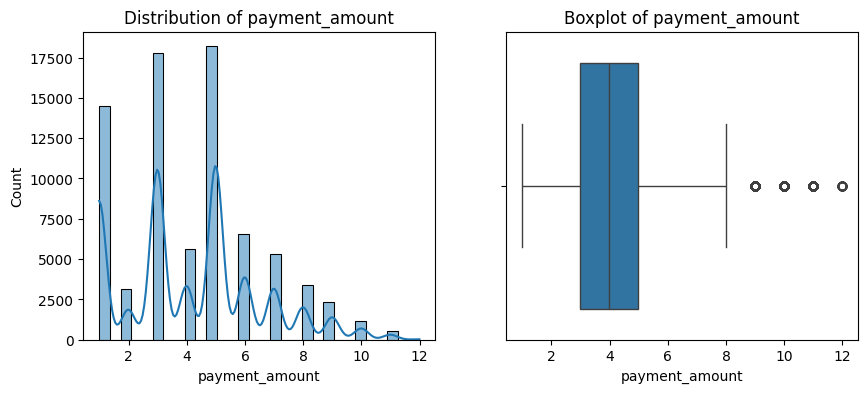

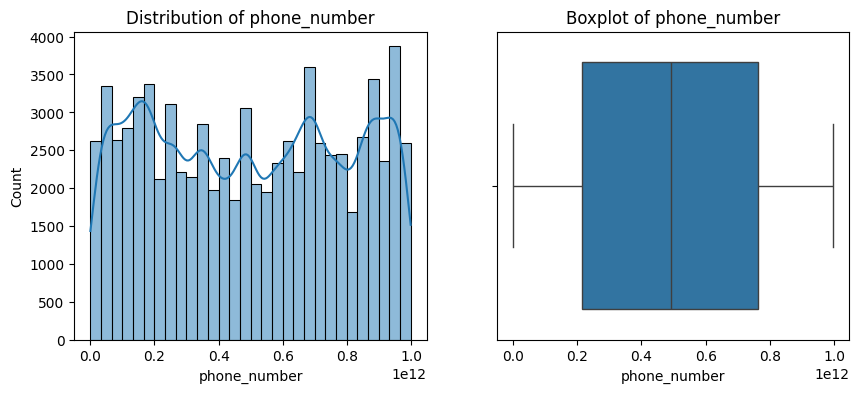

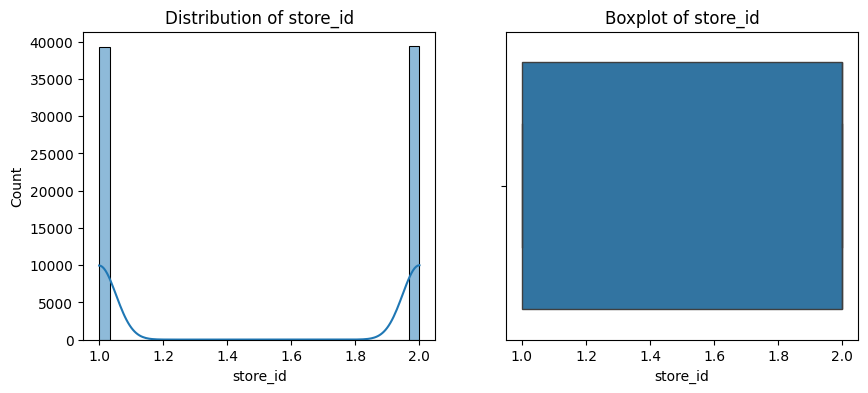

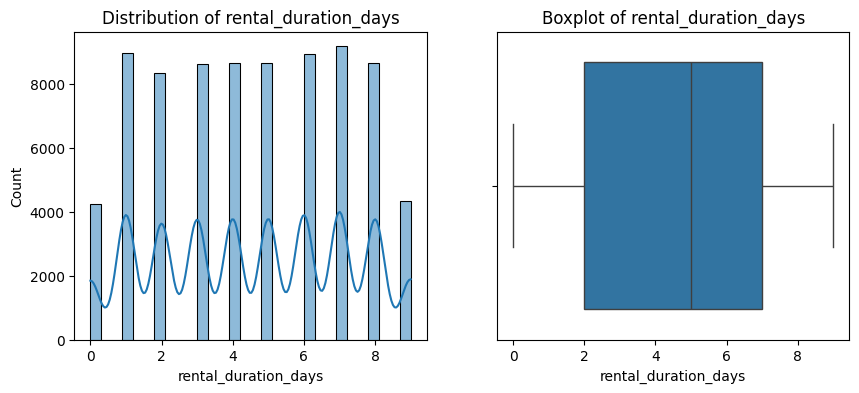

In [9]:
# Visualize distribution of numerical columns
for col in numerical_cols:
    plt.figure(figsize=(10, 4))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
    
    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    
    plt.show()

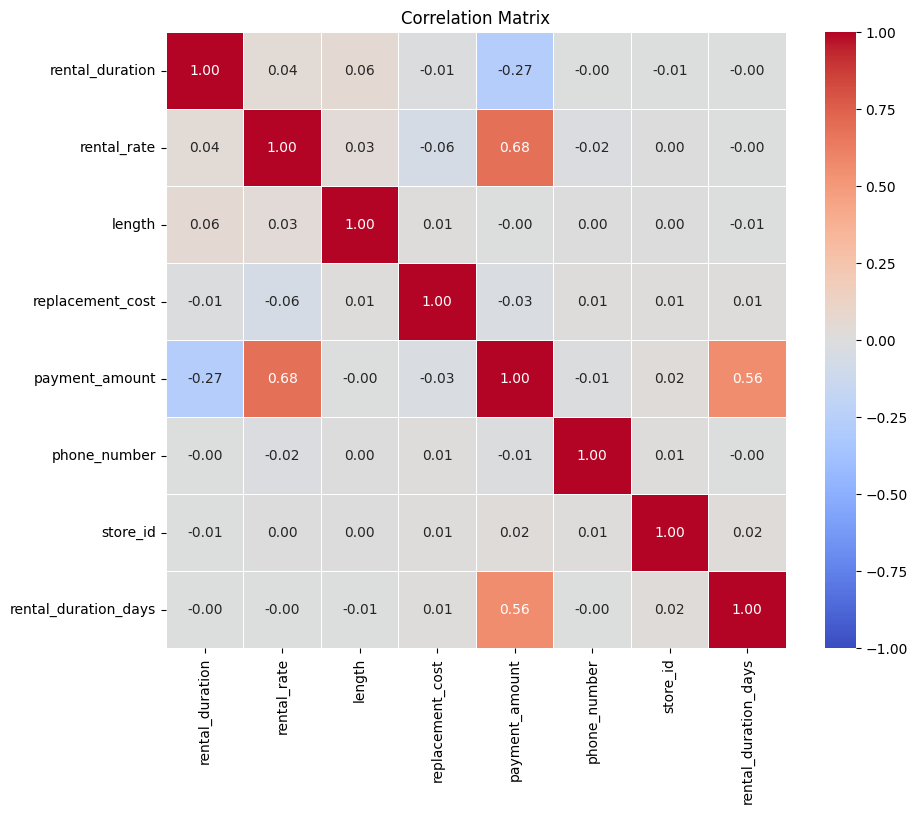

In [16]:
# Correlation matrix for numerical columns
plt.figure(figsize=(10, 8))
corr_matrix = df[numerical_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt=".2f", vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.show()

#### Categorical Columns

In [ ]:
# from sklearn.feature_selection import VarianceThreshold

# # Set a threshold for variance
# threshold = 0.1
# selector = VarianceThreshold(threshold)
# high_var_features = selector.fit_transform(df)

# missing_percentage = df.isnull().mean() * 100
# print(missing_percentage[missing_percentage > threshold])

In [ ]:
# remove unnecessary columns

# df.drop(['release_year', 'film_language', 'film_title','film_description'] axis=1, inplace=True)
# df.drop(['rental_date','return_date'], axis=1, inplace=True)